In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib inline

In [3]:
import scipy.stats as stats
from matplotlib.ticker import FuncFormatter

In [4]:
df_original = pd.read_json('data/train_new.json')

In [3]:
df = df_original.copy()

In [4]:
num_rows, num_cols = df.shape

Not all of the datatypes are correct

In [84]:
df.dtypes

acct_type              object
approx_payout_date      int64
body_length             int64
channels                int64
country                object
currency               object
delivery_method       float64
description            object
email_domain           object
event_created           int64
event_end               int64
event_published       float64
event_start             int64
fb_published            int64
gts                   float64
has_analytics           int64
has_header            float64
has_logo                int64
listed                 object
name                   object
name_length             int64
num_order               int64
num_payouts             int64
object_id               int64
org_desc               object
org_facebook          float64
org_name               object
org_twitter           float64
payee_name             object
payout_type            object
previous_payouts       object
sale_duration         float64
sale_duration2          int64
show_map  

In [85]:
df.shape

(14337, 44)

In [9]:
df.columns

Index([         u'acct_type', u'approx_payout_date',        u'body_length',
                 u'channels',            u'country',           u'currency',
          u'delivery_method',        u'description',       u'email_domain',
            u'event_created',          u'event_end',    u'event_published',
              u'event_start',       u'fb_published',                u'gts',
            u'has_analytics',         u'has_header',           u'has_logo',
                   u'listed',               u'name',        u'name_length',
                u'num_order',        u'num_payouts',          u'object_id',
                 u'org_desc',       u'org_facebook',           u'org_name',
              u'org_twitter',         u'payee_name',        u'payout_type',
         u'previous_payouts',      u'sale_duration',     u'sale_duration2',
                 u'show_map',       u'ticket_types',           u'user_age',
             u'user_created',          u'user_type',      u'venue_address',
            

In [31]:
col_lst = [str(s) for s in df.columns.values]

In [40]:
df.drop_duplicates(keep='last')

TypeError: drop_duplicates() got an unexpected keyword argument 'keep'

To display all the columns without the '...'

In [5]:
pd.set_option('display.max_columns',22)

## The first 22 columns

In [170]:
df.iloc[1:3,0:22]

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,listed,name,name_length,num_order
1,0,1296720000,3499,0,US,USD,1,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,1296288000,1293833295,1296255600,0,868.02,0,0,1,n,Winthrop RUF Winter Getaway,27,23
2,0,1296172800,2601,8,US,USD,1,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,1295740800,1291091908,1295713800,0,3500.00,0,NaN,0,y,DRDP (2010) Teacher Training,28,19


### Body_Length

In [62]:
df.body_length.describe()

count    14337.000000
mean      3672.521936
std       5758.113003
min          0.000000
25%        750.000000
50%       1990.000000
75%       4280.000000
max      65535.000000
Name: body_length, dtype: float64

In [122]:
df['row_num']=range(num_rows)

In [171]:
colors = np.where(df.acct_type == 1,'r','k')

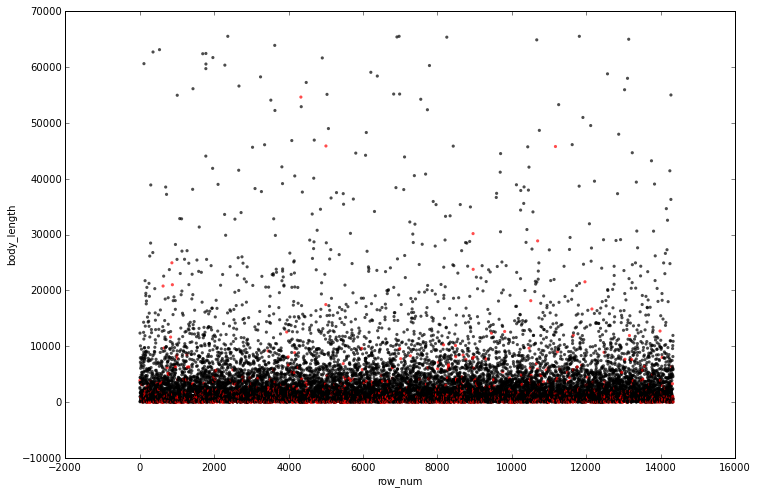

In [172]:
df.plot(kind='scatter',x='row_num',y='body_length',c=colors,figsize=(12,8),s=10,edgecolors='none',alpha=.7)

In [198]:
df['body_GT1000'] = df['body_length'].map(lambda x: 0 if x <=1000 else 1)

In [209]:
(df.query('body_length > 1000 and acct_type == 0').shape[0]/13044.) 

0.7262342839619749

In [188]:
(df.query('body_length > 1000 and acct_type == 1').shape[0]/1293.)

0.33874709976798145

approximatly 73% of non-fraud events have a body length greater than 1000, 33% of fraud event 

In [200]:
df.groupby(['acct_type']).count().body_length

acct_type
0    13044
1     1293
Name: body_length, dtype: int64

testing for independence

In [210]:
pd.crosstab(df.acct_type,df.body_GT1000,margins=True)

body_GT1000,0,1,All
acct_type,,,
0,3571,9473,13044
1,855,438,1293
All,4426,9911,14337


In [212]:
observed = pd.crosstab(df.acct_type,df.body_GT1000)

In [215]:
observed

body_GT1000,0,1
acct_type,,
0,3571,9473
1,855,438


Looks like the variable body_GT1000 is not independent

In [214]:
stats.chi2_contingency(observed=observed)

(825.84802509656254,
 1.2952261517987566e-181,
 1L,
 array([[ 4026.83573969,  9017.16426031],
        [  399.16426031,   893.83573969]]))

### Channels

In [218]:
df.channels.describe()

count    14337.000000
mean         6.176676
std          3.860333
min          0.000000
25%          5.000000
50%          6.000000
75%          8.000000
max         13.000000
Name: channels, dtype: float64

In [219]:
df.channels.unique()

array([ 5,  0,  8,  6, 11, 12,  4, 10, 13,  9,  7], dtype=int64)

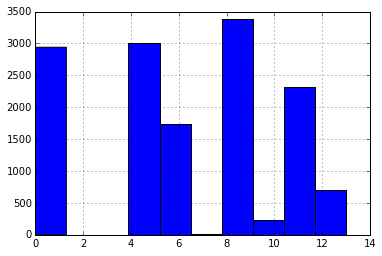

In [220]:
df.channels.hist()

In [226]:
pd.crosstab(df.acct_type,df.channels,margins=True)

channels,0,4,5,6,7,8,9,10,11,12,13,All
acct_type,,,,,,,,,,,,
0,2375,531,2229,1574,8,3255,19,229,2169,454,201,13044
1,566,25,230,162,2,109,1,8,143,16,31,1293
All,2941,556,2459,1736,10,3364,20,237,2312,470,232,14337


In [238]:
channels_table=pd.crosstab(df.channels,df.acct_type)

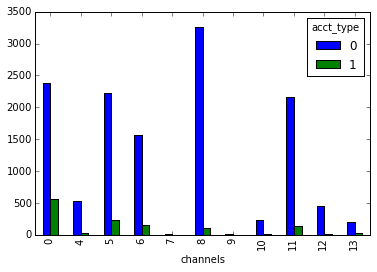

In [266]:
ax = channels_table.plot(kind='bar')

In [267]:
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

In [270]:
ax

In [269]:
plt.show()

In [225]:
stats.chi2_contingency(observed=channels_table)

(583.21920241920282,
 6.9268047171528313e-119,
 10L,
 array([[  2.67576229e+03,   5.05856455e+02,   2.23723206e+03,
           1.57943670e+03,   9.09813769e+00,   3.06061352e+03,
           1.81962754e+01,   2.15625863e+02,   2.10348943e+03,
           4.27612471e+02,   2.11076794e+02],
        [  2.65237707e+02,   5.01435447e+01,   2.21767943e+02,
           1.56563298e+02,   9.01862314e-01,   3.03386483e+02,
           1.80372463e+00,   2.13741368e+01,   2.08510567e+02,
           4.23875288e+01,   2.09232057e+01]]))

## Remaining Columns 

In [7]:
df.iloc[1:3,22:]

,num_payouts,object_id,org_desc,org_facebook,org_name,org_twitter,payee_name,payout_type,previous_payouts,sale_duration,sale_duration2,show_map,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state
1,1,786878,"<p>Since 1987, RUF has ministered to students ...",0,RUF at Winthrop University,12,RUF,CHECK,"[{u'name': u'RUF', u'created': u'2010-10-01 01...",28,28,0,"[{u'event_id': 786878, u'cost': 35.0, u'availa...",149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC
2,4,787337,"<p><a href=""http://www.desiredresults.com"">www...",0,University Preparation School in collaboration...,0,University Preparation School,CHECK,"[{u'name': u'Danielle Severn', u'created': u'2...",54,54,0,"[{u'event_id': 787337, u'cost': 93.51, u'avail...",214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA


In [8]:
df.iloc[1:3,40:]

,venue_latitude,venue_longitude,venue_name,venue_state
1,32.776566,-79.930922,"The Charleston, SC area",SC
2,33.944201,-118.080419,Los Angeles County Office of Education,CA


## Target variable

In [9]:
df.iloc[:,0].describe()

count       14337
unique         12
top       premium
freq        12373
Name: acct_type, dtype: object

In [10]:
df['acct_type'].unique()

array([u'fraudster_event', u'premium', u'spammer_warn', u'fraudster',
       u'spammer_limited', u'spammer_noinvite', u'locked', u'tos_lock',
       u'tos_warn', u'fraudster_att', u'spammer_web', u'spammer'], dtype=object)

Transforming the target variable: if the target variable contains the string "fraud" then mark it as a 1 else 0 

In [151]:
df['acct_type'] = df['acct_type'].map(lambda x: 0 if 'fraud' not in x else 1)

There are ~10X more non-fraud event than fraud events

In [195]:
num_nf,num_f = df.groupby('acct_type').count().row_num.values

In [197]:
df.groupby('acct_type').count().row_num.values

array([13044,  1293], dtype=int64)

# Misc

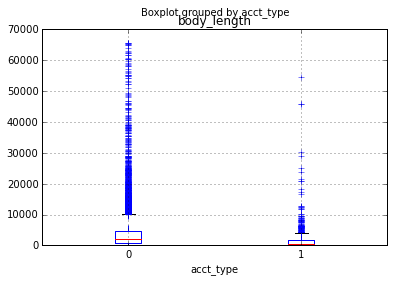

In [71]:
df.boxplot(column='body_length',by='acct_type')

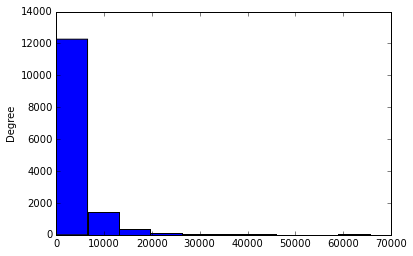

In [63]:
df.body_length.plot(kind='hist')

In [205]:
pd.pivot_table(df,index=['acct_type'],columns=['body_GT1000'],values='body_length')

body_GT1000,0,1
acct_type,,
0,422.027723,5193.169640
1,240.333333,3985.171233


In [43]:
df['approx_payout_date'] = pd.to_datetime(df['approx_payout_date'],unit='s') #you can use .dt.date to just get the dateV